<a href="https://colab.research.google.com/github/helenkristanti/Random_Forest_Skripsi/blob/main/APP_04_SKRIPSI_HELEN_LABELLING_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***READING THE DATASET OF PREPROCESSING RESULTS***

In [ ]:
import pandas as pd
import numpy as np

def load_data():
    data = pd.read_csv('Hasi-Preprocessing-Data#02.csv')
    return data

tweet_df = load_data()
tweet_df.head(4)

,created_at,full_text,reply_count,retweet_count,favorite_count,lang,cleasing,Tokenization and Case Folding,Filtering/ stopword removal,tweet
0,Fri May 12 03:44:28 +0000 2023,"Official BTS PTD Seoul Mini Photocards (Jin,RM...",0,3,0,in,Official BTS PTD Seoul Mini Photocards JinRMam...,"['official', 'bts', 'ptd', 'seoul', 'mini', 'p...","['official', 'bts', 'ptd', 'seoul', 'mini', 'p...",official bts ptd seoul mini photocards jinrmam...
1,Sat May 13 15:11:54 +0000 2023,[#YOUTH ] \n\nBTS Universe dizisi 'YOUTH' oyun...,3,82,668,in,YOUTH nnBTS Universe dizisi YOUTH oyuncuların...,"['youth', 'nnbts', 'universe', 'dizisi', 'yout...","['youth', 'nnbts', 'universe', 'dizisi', 'yout...",youth nnbts universe dizisi youth oyuncularınn...
2,Sat May 13 11:55:58 +0000 2023,Saya jelaskan ya. BTS (Hangul: 방탄소년단; Bangtan ...,1,0,0,in,Saya jelaskan ya BTS Hangul 방탄소년단 Bangtan Sony...,"['saya', 'jelaskan', 'ya', 'bts', 'hangul', '방...","['ya', 'bts', 'hangul', '방탄소년단', 'bangtan', 's...",ya bts hangul bangtan sonyeondan bangtan boys...
3,Wed May 03 02:49:17 +0000 2023,Yoongi Sowoozoo Mini pc set with pajama pc\n\n...,0,1,1,in,Yoongi Sowoozoo Mini pc set with pajama pcnn₱n...,"['yoongi', 'sowoozoo', 'mini', 'pc', 'set', 'w...","['yoongi', 'sowoozoo', 'mini', 'pc', 'set', 'w...",yoongi sowoozoo mini pc set with pajama pcnn n...


# ***DELETE UNUSED COLUMN***

In [ ]:
tweet_df.drop(tweet_df.columns[[1,5,6,7,8]], axis = 1, inplace = True)
tweet_df.head(4)

,created_at,reply_count,retweet_count,favorite_count,tweet
0,Fri May 12 03:44:28 +0000 2023,0,3,0,official bts ptd seoul mini photocards jinrmam...
1,Sat May 13 15:11:54 +0000 2023,3,82,668,youth nnbts universe dizisi youth oyuncularınn...
2,Sat May 13 11:55:58 +0000 2023,1,0,0,ya bts hangul bangtan sonyeondan bangtan boys...
3,Wed May 03 02:49:17 +0000 2023,0,1,1,yoongi sowoozoo mini pc set with pajama pcnn n...


# ***FOR INFORMATION DATASET***

In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      764 non-null    object
 1   reply_count     764 non-null    int64 
 2   retweet_count   764 non-null    int64 
 3   favorite_count  764 non-null    int64 
 4   tweet           764 non-null    object
dtypes: int64(3), object(2)
memory usage: 30.0+ KB


# ***INSTALL LIBRARIES NLTK***

In [ ]:
!pip install nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Mengunduh corpus NLTK yang diperlukan
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# ***MEMBAGI DATASET MENJADI KELAS POSITIF, NEGATIF, DAN NETRAL***

In [ ]:
# Menginisialisasi objek SentimentIntensityAnalyzer
data = SentimentIntensityAnalyzer()

# Melakukan pelabelan pada dataset
labels = []
for text in tweet_df['tweet']:
    sentiment_scores = data.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score > 0:
        label = 'positif'
    elif compound_score < 0:
        label = 'negatif'
    else:
        label = 'netral'

    labels.append(label)

# Menambahkan kolom label pada dataset
tweet_df['label'] = labels

# Menampilkan dataset dengan kolom label
tweet_df.head(5)

,created_at,reply_count,retweet_count,favorite_count,tweet,label
0,Fri May 12 03:44:28 +0000 2023,0,3,0,official bts ptd seoul mini photocards jinrmam...,netral
1,Sat May 13 15:11:54 +0000 2023,3,82,668,youth nnbts universe dizisi youth oyuncularınn...,positif
2,Sat May 13 11:55:58 +0000 2023,1,0,0,ya bts hangul bangtan sonyeondan bangtan boys...,netral
3,Wed May 03 02:49:17 +0000 2023,0,1,1,yoongi sowoozoo mini pc set with pajama pcnn n...,netral
4,Fri Apr 28 14:12:50 +0000 2023,0,1,0,bts album photocardsnn n lfb sco ph ls bangtan...,netral


# ***SAVE LABELING RESULTS DATA***

In [ ]:
tweet_df.to_csv('Hasil-Labelling-Data-nltk.csv',encoding='utf8', index=False)

# ***JUMLAH ANALISIS SENTIMEN BTS***

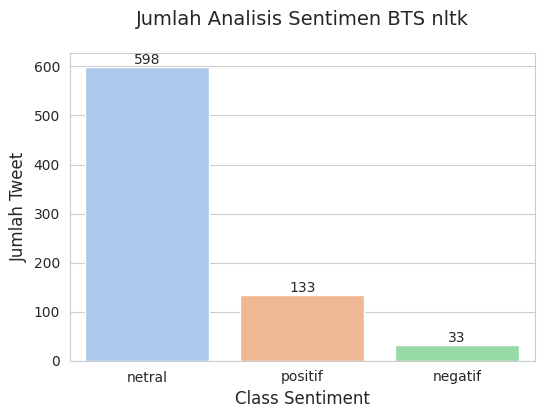

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
df = pd.read_csv('Hasil-Labelling-Data-nltk.csv')

# menghitung jumlah setiap sentimen
sentiment_count = df['label'].value_counts()

# mengatur gaya plot
sns.set_style('whitegrid')

# membuat petak batang
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen BTS nltk', fontsize=14, pad=20)
plt.xlabel('Class Sentiment',fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

# tambahkan label di atas setiap batang
for i, count in enumerate(sentiment_count.values):
    ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show()

# ***PRESENTASE ANALISIS SENTIMEN BTS***

764


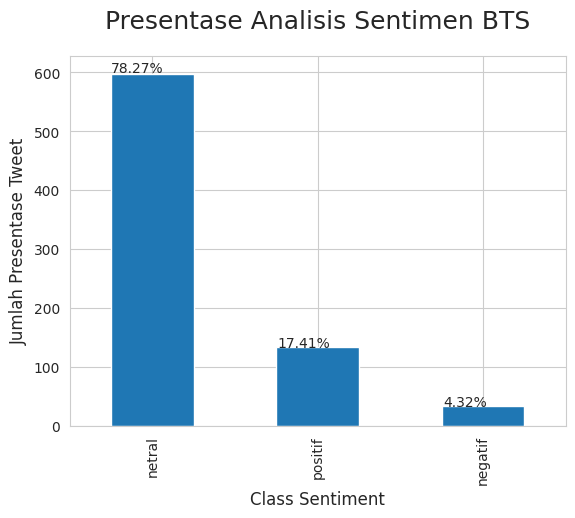

In [ ]:
plt.title('Presentase Analisis Sentimen BTS', fontsize=18, pad=20)
plt.xlabel('Class Sentiment',fontsize=12)
plt.ylabel('Jumlah Presentase Tweet', fontsize=12)

s = pd.value_counts(df['label'])
ax = s.plot.bar()
n = len(df.index)
print(n)
for p in ax.patches:
  ax.annotate(str(round(p.get_height() / n*100, 2)) + '%', (p.get_x() * 1.005, p.get_height() *1.005))

***PIE CHART PRESENTASE ANALISIS SENTIMEN***

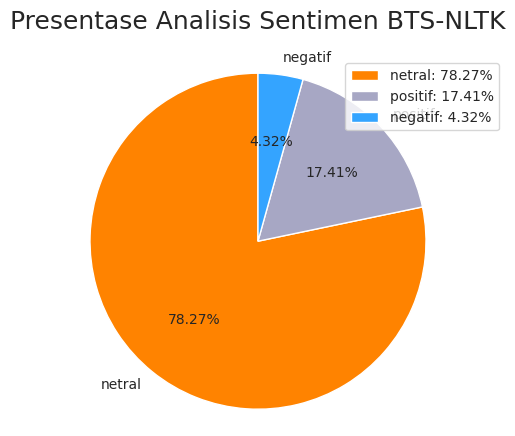

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
data = pd.read_csv('Hasil-Labelling-Data-nltk.csv')

# Menghitung jumlah label
labels = data['label'].value_counts()

# Data untuk pie chart
labels_pie = labels.index.tolist()
values_pie = labels.tolist()
colors = ['#FF8300', '#A7A7C4', '#34A4FF']  # Ganti warna sesuai kebutuhan

# Membuat pie chart
plt.title('Presentase Analisis Sentimen BTS-NLTK', fontsize=18, pad=20)
plt.pie(values_pie, labels=labels_pie, colors=colors, autopct='%.2f%%', startangle=90)

# Membuat lingkaran di tengah pie chart
center_circle = plt.Circle((0, 0), 0.0, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Menambahkan persentase dan teks di luar pie chart
total = sum(values_pie)
percentages = [(value / total) * 100 for value in values_pie]
labels_with_percentage = [f"{label}: {percentage:.2f}%" for label, percentage in zip(labels_pie, percentages)]

# Menampilkan pie chart dengan legend di luar
plt.axis('equal')
plt.legend(labels_with_percentage, loc='best')

# Menampilkan pie chart
plt.show()


# ***WORDCLOUD SENTIMEN BTS***

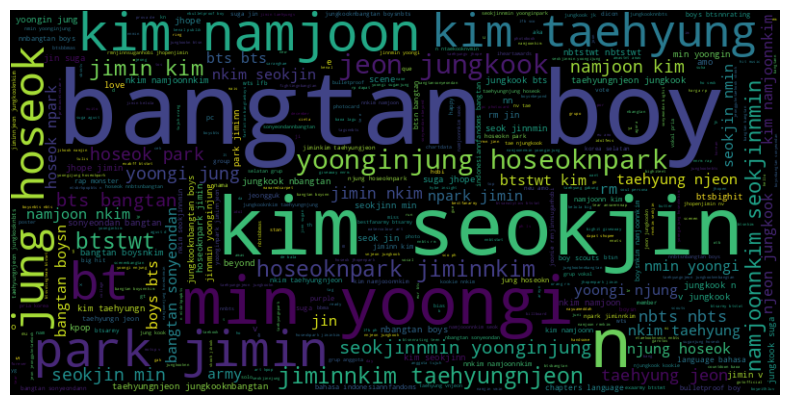

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Menggabungkan semua tweet menjadi satu string
data = ' '.join(df['tweet'].tolist())

# Menghilangkan kata-kata yang tidak diinginkan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

# Membuat objek WordCloud
wc = WordCloud(stopwords=stopwords, background_color="black", max_words=1000, width=800, height=400)

# Menghasilkan WordCloud dari string tweet
wc.generate(data)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()